<p style='text-align: right; font-size: 15px'> DATA407: Data Science Application I </p> 

<center> <h1> 
    Midterm Assignment
    </h1> </center>

<center> <h4> Provided on April 27 (Thursday), 2023 <br>
Due on May 11 (Thursday), 2023 </h4> </center>


<h3> <p style='text-align: center;'>  Jong-Hwan Lee (Instructor) and Sangsoo Jin (TA) </p> </h3> 

<p style='text-align: center; font-size: 15px'> Reference: Neuroimaging and Data Science by Ariel Rokem & Tal Yarkoni, 2021 (http://neuroimaging-data-science.org) 
</p>

# Preface

In this midterm assignment, you will need to fill out the codes in this Notebook and submit it (Notebook file) at the Blackboard.

Before start, we will need to download the CSV files by executing the commands below:

> If the wget command does not work, please **download** the following csv files and place them at the **same directory of this Notebook**.
- [subjects.csv](https://yeatmanlab.github.io/AFQBrowser-demo/data/subjects.csv)
- [nodes.csv](https://yeatmanlab.github.io/AFQBrowser-demo/data/nodes.csv)

In [3]:
!wget https://yeatmanlab.github.io/AFQBrowser-demo/data/subjects.csv

zsh:1: command not found: wget


Please note that you can run **shell commands** in the Notebook by using the prefix ```!``` in front of the command.

For example, ```!ls``` will run the shell command ```ls```.

In [4]:
!ls

1. Introduction
10. Visualizing data with python
11. Data science tools for neuroimaging
12. Reading neuroimaging data with Nibabel
13
13. Using nibabel to align different measurements
2. The Unix operating system
3. Version control
4. Computational environments and computational containers
5. A breif introduction to Python
6. The python environment
7. Sharing code with others
8. The scientific python ecosystem
9. Manipulating tabular data with Pandas
DATA407_Midterm_Assignment.ipynb
bold.npy
my_project
nodes.csv
reference_bold_1.npy
reference_bold_2.npy
subjects.csv


Now please feel free to start filling out the missing codes in the cells and answering the questions.

# Assignments

## Q1

Let's preview the content of the ```subjects.csv```. In neuroimaging analysis, it is important to identify handedness of participants. Most of the case, we will restrict **right-handed** subjects. However, it is hard to manually count the number of them. You need to write a **shell command** that shows **the number of right-handed participants** in ```subjects.csv```. Note that the command should return **only one value** (the number of right-handed participants; e.g., 10).

> On Windows, you may not be able to run UNIX shell commands. If that, we recommend installing [Git-for-Windows](https://gitforwindows.org/). After that, you can invoke a bash shell terminal by right-clicking on the project directory and select `Git Bash Here`. You can run most of shell commands at the Git Bash Terminal. 

In [5]:
!grep -c "Right" subjects.csv

62


## Q2

## Q2-1

In Chapter 8, we have learned how to handle an fMRI BOLD data (in Numpy array). The example BOLD data can be loaded using the following commands:

In [6]:
from ndslib import load_data
bold = load_data("bold_numpy", fname="bold.npy")

Before analyzing a brain data, we need to **preprocess** it; one of the necessary preprocessing steps is called **scaling**, which transforms a raw timeseries data into a **percent signal change** data.

A 'percent signal change' means a percent ratio of a **raw signal** at time _t_ over the **time-averaged mean**. 

For example, let's assume a timeseries of a voxel is \[100, 200, 600, 100\]. The average signal across time will be \(100 + 200 + 600 + 100\) / 4 = 250.
Then, we can compute the percent signal change at time 0 as \(**raw signal** at time 0\) / \(**average signal**\) * 100 = 100 / 250 * 100 = 40. The scaled timeseries data will be \[40, 80, 240, 40\].
 
Suppose that percent signals over 200 are classified as **"noise"**, so we **"clamp"** the signals over 200 to be 200. Therefore, the final scaled data will be \[40, 80, _200_, 40\].

Now, you need to implement a scaling function called `scale_bold` which takes a Numpy array `input_bold` and clamping threshold `threshold` as inputs. Please make sure the input parameter `threshold` is a **optional keyword argument** with a default value of **200**, so that we can call `scale_bold` with only an input Numpy array.

In [7]:
import numpy as np

def scale_bold(input_bold, threshold=200):
   # scaling
   mean_signal = np.mean(input_bold, axis=-1, keepdims=True)
   percent_signal_change = (input_bold/(mean_signal+1e-10))*100
    
   # clamping
   percent_signal_change[percent_signal_change > threshold] = threshold

   return percent_signal_change

You can test your implementation using the `test_scale_bold` function bellow. For correct implmentation, `test_scale_bold` would return nothing without any `TypeError` or `AssertionError`.

In [8]:
def test_scale_bold():
    assert np.allclose(scale_bold(bold)[32, 32, 12, :20], \
        np.array([103.89776973, 101.20412384, 101.5889304, 104.5711812, \
                  110.24707788, 110.34327951, 106.30281069, 102.35854351, \
                  108.51544838, 104.76358447, 105.3407943, 100.91551893, \
                  106.68761725, 101.1079222, 103.32055989, 103.22435825, \
                  106.97622216, 104.47497956, 104.85978611, 102.16614023])), \
        "First 20 timepoints of the scaled array are different from the true values."
    
    assert np.max(scale_bold(bold, 300)) == 300, "The scaled array is not clamped at the input threshold value."

In [9]:
test_scale_bold()

### Hints

- The original BOLD array is a 4D array (x, y, z, time), whereas the time-averaged signal array would be a 3D. You need to find a way to match dimensions of two arrays for arithmetic operations.

- In Numpy, 'division by zero' results in NaN ('not a number'). How is this possible in `scale_bold` and how coud you avoid division by zero (and resulting NaNs)?

## Q2-2

Once you have obtained percent BOLD signal change using the `scale_bold` function, evaluate the results by visualizing both the time-series and image plots using the `matplotlib.pyplot` library.


1. Show BOLD time-series at the voxel location at **(32, 32) in the 12th slice** for the **original `bold`** and **scaled (percentage) `bold`** signal using two subplots (Hint: use the `plt.plot` function)


2. Show brain image at the **12th slice** of the **first volume (TR = 0)** for the original `bold` and scaled (percentage) `bold` data using two subplots (Hint: use the `plt.matshow` function)

> The `bold` array is a 4D array (x, y, z, time). Note that the `z` axis is also called as `slice` and `time` axis is also called as `volume`.

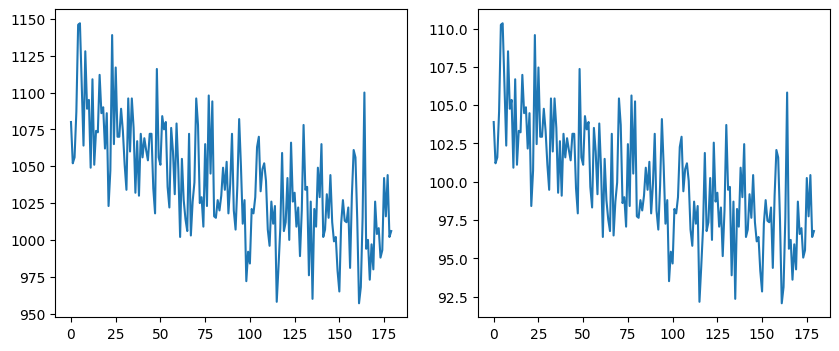

In [10]:
# Your answer here (1)
import matplotlib.pyplot as plt

data1 = bold[32, 32, 12]
data2 = scale_bold(bold, 200)[32, 32, 12]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

ax1.plot(data1)
ax2.plot(data2)

plt.show()

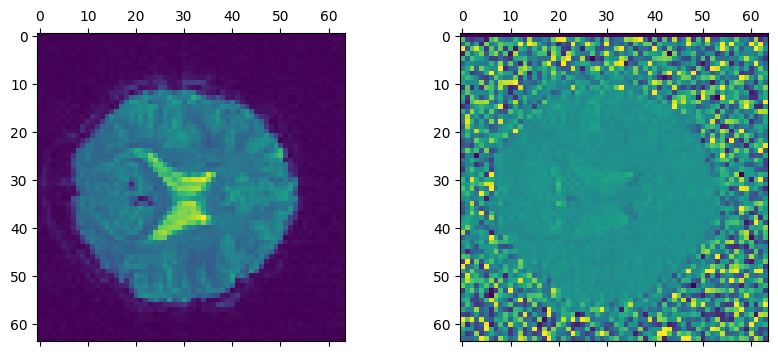

In [11]:
# Your answer here (2)
data1 = bold[..., 12, 0]
data2 = scale_bold(bold, 200)[..., 12, 0]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

ax1.matshow(data1)
ax2.matshow(data2)

plt.show()

## Q2-3

Now, let's calculate brain activation maps from the measured BOLD data.

This can be done by calculating correlation coefficient maps between each voxel's time-series and reference BOLD signal that contains a task paradigm.

First, let's suppose there are two reference BOLD signals related to the task paradigm.
- You need to load the reference BOLD signals from the 'reference_bold_1.npy' and 'reference_bold_2.npy' files
    - Please load these two files into two variables called `reference_bold_1` and `reference_bold_2`, respectively.
    - Then, visualize them to see their shapes using `plt.plot` 

> Note: you need to download two .npy files (`reference_bold_1.npy` and `reference_bold_2.npy`) from the Blackboard and place them in the same directory of the assignment Notebook file.

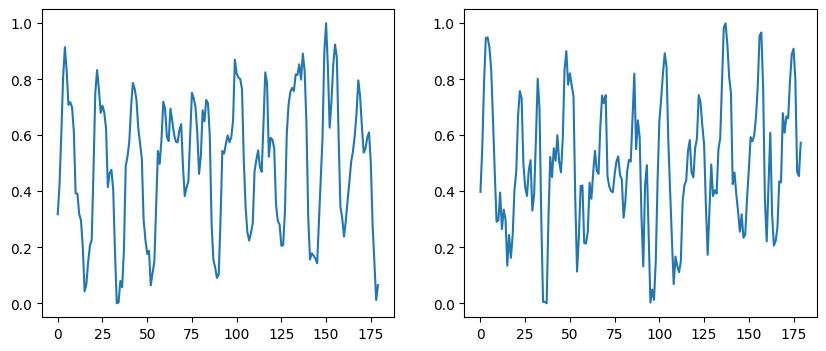

In [12]:
# Your answer here

reference_bold_1 = np.load('reference_bold_1.npy')
reference_bold_2 = np.load('reference_bold_2.npy')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

ax1.plot(reference_bold_1)
ax2.plot(reference_bold_2)

plt.show()

Now, let's estimate the brain areas with task-related activations based on the BOLD intensity.

1. Obtain the maximum BOLD intensity in the `bold` array 
    - Let's save the maximum intensity value of the `bold` array in a variable named `max_bold_intensity`.

<br />

2. Obtain the 3D array with time-averaged BOLD intensity in each voxel 
    - You need to average the `bold` array by time and store this array into a variable `mean_bold`.

<br />

3. Calculate the brain area as a mask array that includes in-brain voxels whose voxel intensity is above a threshold, 0.2 * maximum BOLD intensity)
    - Threshold/mask the `mean_bold` array at the threshold value (i.e., 0.2 * `max_bold_intensity`) and store the mask in a variable `brain_mask`.
    - Try to plot the mask (`brain_mask`) that contains a brain area using `plt.matshow` or `plt.imshow` 

<br />

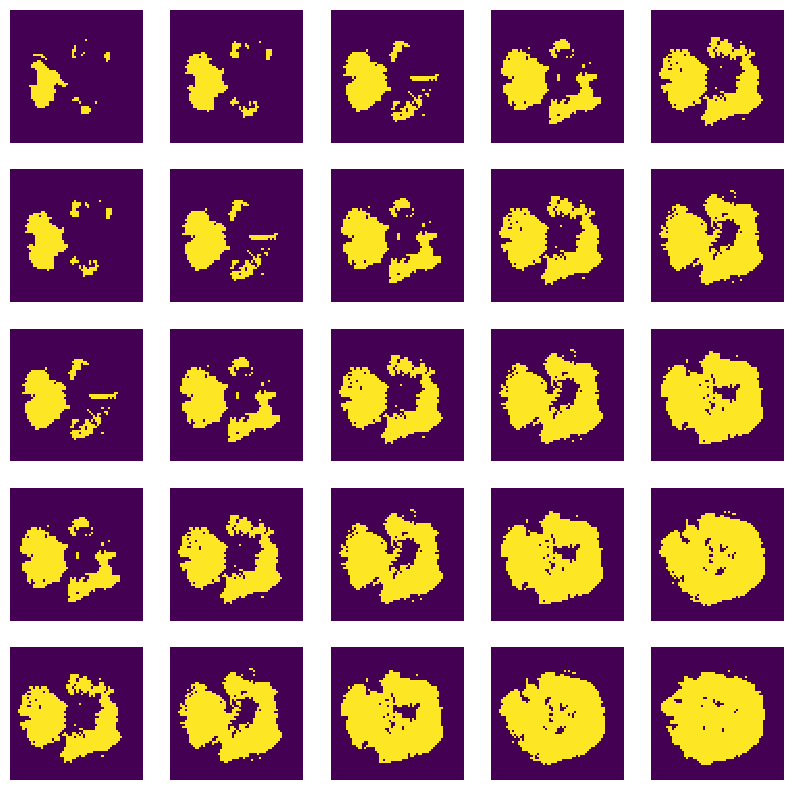

In [13]:
# Step 1: Obtain the maximum BOLD intensity
max_bold_intensity = np.max(bold)

# Step 2: Obtain the time-averaged BOLD intensity in each voxel
mean_bold = np.mean(bold, axis=3) # 4-dim -> 3-dim

# Step 3: Calculate the brain mask
threshold = 0.2 * max_bold_intensity
brain_mask = mean_bold > threshold

# checked that value of the brain_mask.shape[2] is 25
# Loop over each voxel and plot (along z-axis slice)
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 5, figsize=(10, 10))

for row in range(5):
    for col in range(5): 
        axs[row, col].matshow(brain_mask[:, :, row+col])
        axs[row, col].axis('off')

plt.show()

## Q2-4

Now, let's calculate the Pearson's correlation coefficient (r) between the voxel time-series (from `bold`) and each of these two reference bold signals (`reference_bold_1` and `reference_bold_2`) for the voxels only in the brain mask area (`brain_mask`).

1. Initialize two Numpy arrays (`cc_map_1` and `cc_map_2`) which have the same shape of `mean_bold`.

<br />

2. For each voxel (x, y, z) in the `bold` array (**not** `mean_bold`!), extract its time series; Compute Pearson correlation coefficient (r) between the extracted `bold` time-series and `reference_bold_1`. Fill the `cc_map_1` array with the computed correlation coefficients (between `bold` and `reference_bold_1`). Please note that you need to restrict the computation **only inside of the brain mask**, `brain_mask`.
    - In Python, you can compute Pearson's correlation coefficients using `scipy.stats.pearsonr`. Please check the reference.

<br />

3. Repeat the same step as (2) but fill out the `cc_map_2` array using the `reference_bold_2` vector.

<br />

4. Visualize each of the r-valued maps across all the 25 slices using `plt.subplots` 
    - Note that you need to use only **one colormap** to distinguish the r-values across all the slices using the optional arguments `vmin` and `vmax` in `plt.matshow` or `plt.imshow`.
    - **More detailed explanation**: If you do not specify `vmin` and `vmax` of colormaps for plotting the 25 subplots, then each subplot uses different colormaps so we cannot visually compare between subplots. Therefore, **you need to specify the same `vmin` and `vmax` for all subplots** for meaningful visualization. 



In [14]:
from scipy.stats import pearsonr

# Step 1: Initialize two Numpy arrays
cc_map_1 = np.zeros_like(mean_bold)
cc_map_2 = np.zeros_like(mean_bold)

# Step 2: Compute Pearson's correlation coefficient between `bold` and `reference_bold_1`
for i in range(bold.shape[0]):
    for j in range(bold.shape[1]):
        for k in range(bold.shape[2]):
            if brain_mask[i, j, k]: # restrict the computation only inside of the brain mask, brain_mask
                bold_ts = bold[i, j, k, :] 
                r, _ = pearsonr(bold_ts, reference_bold_1) # pearsonr returns two value: correlation coefficients and p-value
                cc_map_1[i, j, k] = r

# Step 3
for i in range(bold.shape[0]):
    for j in range(bold.shape[1]):
        for k in range(bold.shape[2]):
            if brain_mask[i, j, k]: 
                bold_ts = bold[i, j, k, :] 
                r, _ = pearsonr(bold_ts, reference_bold_2)
                cc_map_2[i, j, k] = r


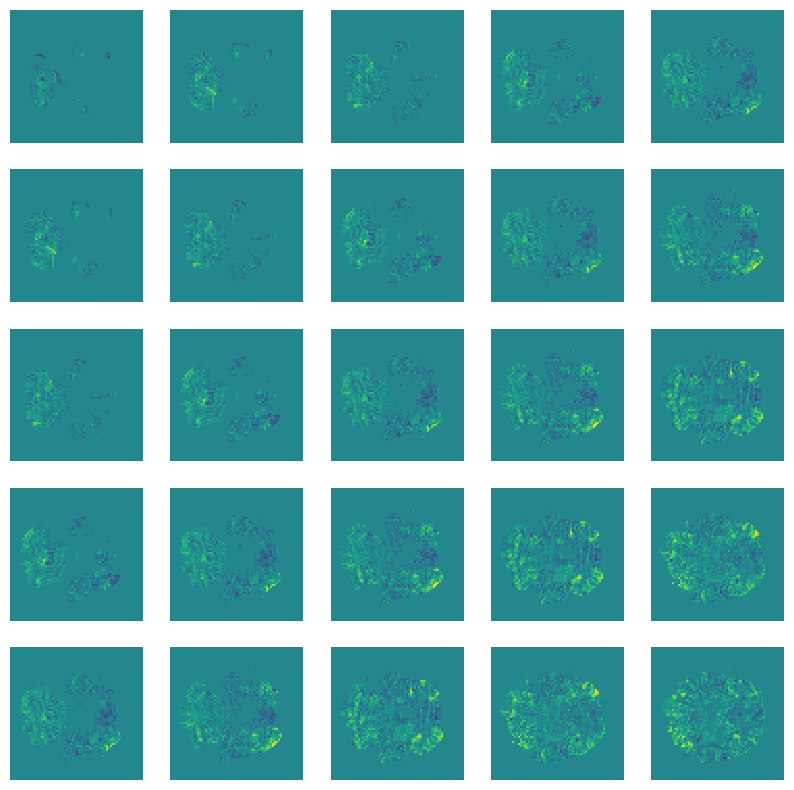

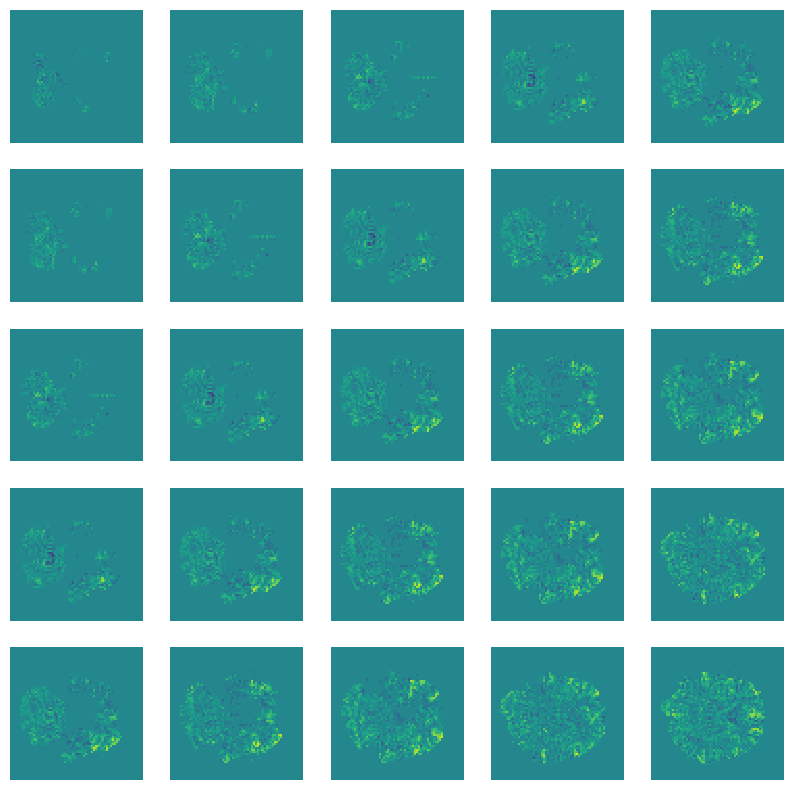

In [57]:
# Step 4
fig, axs = plt.subplots(5, 5, figsize=(10, 10), sharex=True, sharey=True)

vmin = min(cc_map_1.min(), cc_map_2.min())
vmax = max(cc_map_1.max(), cc_map_2.max())

# Plot CC Map 1
for row in range(5):
    for col in range(5): 
        axs[row, col].matshow(cc_map_1[:, :, row+col], vmin=vmin, vmax=vmax)
        axs[row, col].axis('off')
plt.show()

# Plot CC Map 2
fig, axs = plt.subplots(5, 5, figsize=(10, 10), sharex=True, sharey=True)
for row in range(5):
    for col in range(5): 
        axs[row, col].matshow(cc_map_2[:, :, row+col], vmin=vmin, vmax=vmax)
        axs[row, col].axis('off')
plt.show()

Please discuss on the results including the visualizations.

Your answer here:
- plot.subplots를 사용하여 뇌의 25개 슬라이스 각각에 대해 correlation coefficient map을 만들었다. 시각화는 각 뇌 영역 내에서 높은 수준의 기능적 연결성이 있음을 보여주었다. 서로 가까이 있는 voxel은 멀리 떨어져 있는 voxel보다 더 높은 상관계수를 가졌다. 이러한 결과를 통해 뇌의 기능적 구성에 대한 통찰과 뇌의 여러 영역이 서로 어떻게 연결되어 있는지를 보일 수 있다.

## Q3

Let's load two AFQ data files we have reviewed at Chapter 9.

In [31]:
import pandas as pd

afq_subjects = pd.read_csv(
    "./subjects.csv",
    usecols=[1,2,3,4,5,6,7],
    na_values="NaN", index_col=0
)
    
afq_nodes = pd.read_csv(
    "./nodes.csv",
    index_col="subjectID",
    usecols=["subjectID", "tractID", "nodeID", "fa"]
)

In [32]:
afq_subjects.head()

,Age,Gender,Handedness,IQ,IQ_Matrix,IQ_Vocab
subjectID,,,,,,
subject_000,20,Male,NaN,139.0,65.0,77.0
subject_001,31,Male,NaN,129.0,58.0,74.0
subject_002,18,Female,NaN,130.0,63.0,70.0
subject_003,28,Male,Right,NaN,NaN,NaN
subject_004,29,Male,NaN,NaN,NaN,NaN


Let's assume we will want to test a hypothesis that age is positively correlated with Vocabulary IQ (`IQ_Vocab`) but not with Matrix Reasoning IQ (`IQ_Matrix`).

However, there are missing `IQ_Vocab` and `IQ_Matrix` values in the subjects Dataframe (`afq_subjects`) and we want to include only right-handed participants since brain connectivity patterns are different between two groups.

Now, you need to preprocess `afq_subjects` into `afq_subjects_filtered` that contains only `right-handed` subjects with both `IQ_Vocab` and `IQ_Matrix` scores present.

In [33]:
afq_subjects_filtered = afq_subjects[(afq_subjects['Handedness'] == 'Right') & 
                                     (afq_subjects['IQ_Vocab'].notnull()) & 
                                     (afq_subjects['IQ_Matrix'].notnull())]

In [34]:
assert len(afq_subjects_filtered) == 54, "The number of filtered subjects does not match."

## Q4

## Q4-1

Using `afq_subjects_filtered`, you need to draw two lmplot (`seaborn.lmplot`) showing relationship between `Age` and `IQ_Matrix` or `IQ_Vocab`, respectively.

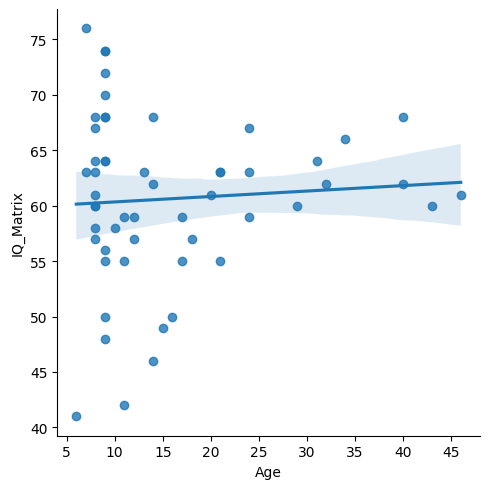

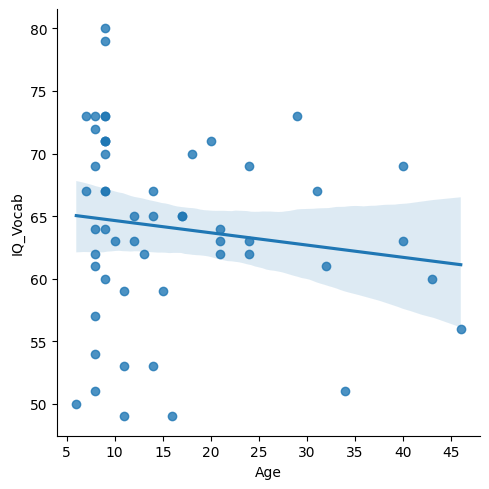

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(afq_subjects_filtered, x='Age', y='IQ_Matrix')
sns.lmplot(afq_subjects_filtered, x='Age', y='IQ_Vocab')

## Q4-2

If you successfully completed Q4-1, you will see that there are many datapoints at **Age below 10** and they seem to **distort** overall relationships. 

Therefore, it would be better to additionally **choose** participants whose age is **over than 10** from `afq_subjects_filtered` and re-draw lmplots to get clearer results.

Please define a new DataFrame `afq_subjects_filtered_over10` that stores the filtered data and repeat the analysis as Q4-1.

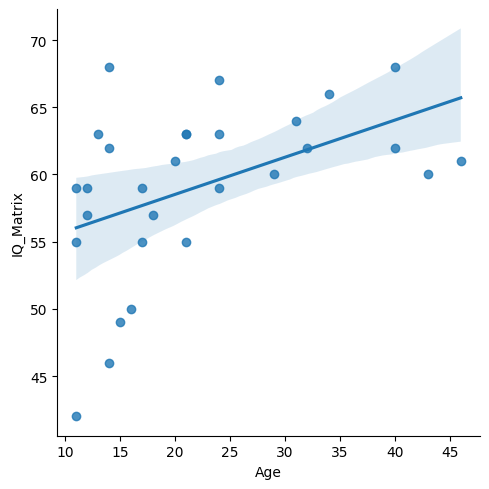

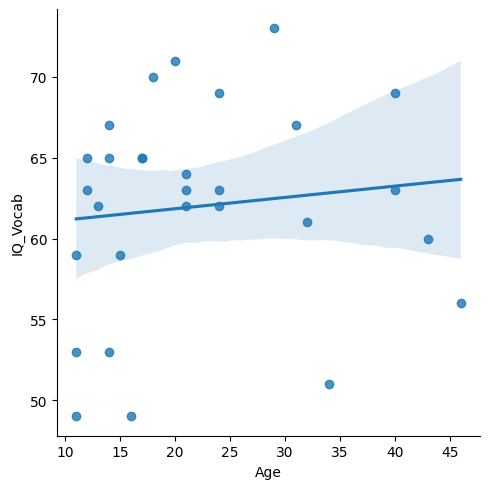

In [21]:
afq_subjects_filtered_over10 = afq_subjects_filtered[afq_subjects_filtered['Age']>10]
sns.lmplot(afq_subjects_filtered_over10, x="Age", y="IQ_Matrix")
sns.lmplot(afq_subjects_filtered_over10, x="Age", y="IQ_Vocab")

## Q4-3

Q4-2 shows the **opposite relationship** compared to our original hypothesis, showing Matrix Reasoning IQ (`IQ_Matrix`) is positively correlated with Age (`Age`) whereas seemingly no relationship between Age and Vocabulary IQ. However, we need to investigate whether this relationship is derived **by chance**, or reflects an actual **significant** effect.

One way to check significance of a linear relationship is to compute the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between two variables. In Python, you can compute the correlation coefficient (`r`) and its p-value (`p`) using `scipy.stats.pearsonr`.

You need to check the reference, compute Pearson correlation coefficients between (1) `Age` and `IQ_Matrix` and also (2) `Age` and `IQ_Vocab`, and check whether there is any significant linear relationship between variables.

> Note that correlations whose **_p_ is less than 0.05** are statistically significant.

In [22]:
from scipy.stats import pearsonr

# Correlation coefficient and p-value for Age and IQ_Matrix
r_age_matrix, p_age_matrix = pearsonr(afq_subjects_filtered_over10['Age'], afq_subjects_filtered_over10['IQ_Matrix'])

# Correlation coefficient and p-value for Age and IQ_Vocab
r_age_vocab, p_age_vocab = pearsonr(afq_subjects_filtered_over10['Age'], afq_subjects_filtered_over10['IQ_Vocab'])

print(p_age_matrix, p_age_vocab)
print(r_age_matrix, r_age_vocab)

0.011917420143240699 0.5543890524118001
0.4606220705570588 0.11445515326922026


The Pearson correlation value is the first value returned by the function. It is denoted as **r**. It represents the strength and direction of the linear relationship between two variables.

The second value in the tuple returned by pearsonr function is the p-value. The p-value represents the probability of observing the calculated correlation coefficient or an even more extreme value under the null hypothesis that there is no correlation between the two variables.

I think **Ag**e and **IQ_Matrix** has statistically significant relationship. (positive linear relationship)

## Q5

## Q5-1

At Q4-3, we found that there is a significant positive relationship between `Age` and `IQ_Matrix`. 

Now we want to investigate what brain connectivity (`fa` value for each `tract`) contribute to these relationship. For the first step, we need to **merge** two DataFrames, `afq_nodes` and `afq_subjects_filtered_over10`. 

Please join two DataFrames and store it into a new DataFrame called `afq_joined`.

> For the additional context, a `fa` value represents strength of a physical connection (that is, neuronal fiber bundle, or `tract`).

In [23]:
afq_joined = pd.merge(afq_nodes, afq_subjects_filtered_over10, on='subjectID')

## Q5-2

The textbook focused on differences in FA (`fa`) values between `nodes` within a `tract`. Let's assume we want to know the mean FA values (across all nodes) for **each tract** and **each participants**.

Please compute these values and store them in a DataFrame `afq_joined_tract`.

> For the additional context, each participant has 20 `tracts`. Each `tract` consists of about 100 `nodes`. We need to average these 100 `nodes` in each `tract` to get a mean FA value of a `tract`, for comparison betweeen participants.

In [36]:
afq_joined_tract = afq_joined.groupby(["subjectID", "tractID"])['fa'].mean().reset_index()
#afq_joined_tract = afq_joined.groupby(["subjectID", "tractID"]).agg({'fa': 'mean', 'Age': 'first', 'IQ_Matrix': 'first'}).reset_index()
afq_joined_tract

,subjectID,tractID,fa
0,subject_007,Callosum Forceps Major,0.664336
1,subject_007,Callosum Forceps Minor,0.549155
2,subject_007,Left Arcuate,0.490403
3,subject_007,Left Cingulum Cingulate,0.542368
4,subject_007,Left Cingulum Hippocampus,0.372692
...,...,...,...
575,subject_076,Right IFOF,0.514972
576,subject_076,Right ILF,0.461611
577,subject_076,Right SLF,0.508948
578,subject_076,Right Thalamic Radiation,0.452237


## Q5-3

Since we have a DataFrame `afq_joined_tract`, we can check relationship between **(mean)** `fa` and `Age` or `fa` and `IQ_Matrix` for any tract. Let's focus on only one tract called `Left Cingulum Cingulate`. 

You need to draw a plot shows a relationship between `Age` and (mean) `fa` of this tract and check whether there is a significant correlation between them.

Likewise, please repeat this analysis on (mean) `fa` and `IQ_Matrix`.

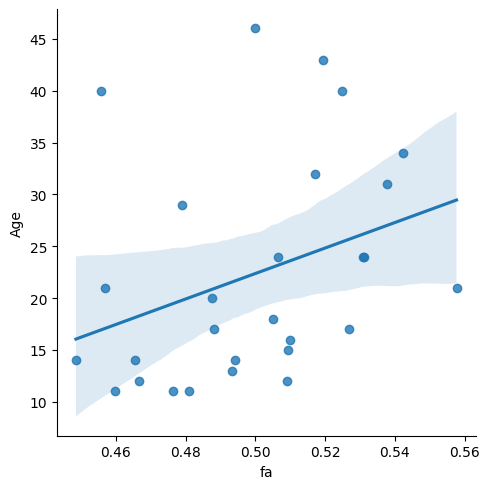

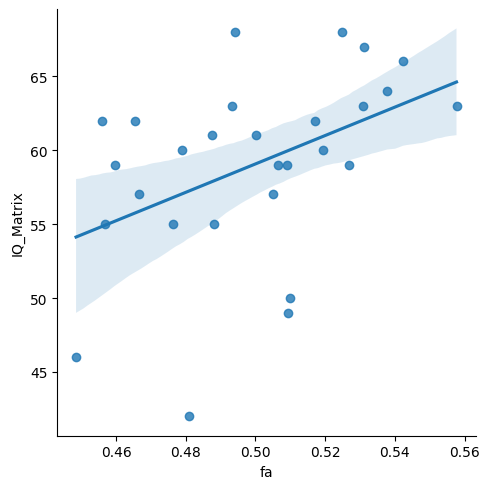

In [25]:
# only get Age and IQ_Matrix data from afq_joined, without duplications
Age_IQMatrix = afq_joined[['Age', 'IQ_Matrix']].drop_duplicates()
lcc = afq_joined_tract[afq_joined_tract['tractID']=="Left Cingulum Cingulate"]
# merge
data = pd.merge(Age_IQMatrix, lcc, on='subjectID')

# draw two lmplots
sns.lmplot(data, x='fa', y='Age')
sns.lmplot(data, x='fa', y='IQ_Matrix')

<p style='text-align: right; font-size: 10px'> DATA407 </p>

<center> <h1> Thank you! </h1>

<h1> Q/A? </h1> </center>

<p style='text-align: right; font-size: 10px'> Midterm assignment </p>